# **Deep Neural Network From Scratch**

Build a multi-layer neural network using only NumPy — no frameworks.

- Use non-linear units like ReLU to improve model
- Build a deeper neural network (with more than 1 hidden layer)

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer.
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example.
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

## Table of Contents
- [1 - Packages](#1)
- [2 - Outline](#2)
- [3 - Initialization](#3)
- [4 - Forward Propagation Module](#4)
    - [4.1 - Linear Forward](#4-1)
    - [4.2 - Linear-Activation Forward](#4-2)
    - [4.3 - L-Model Forward](#4-3)
- [5 - Cost Function](#5)
- [6 - Backward Propagation Module](#6)
    - [6.1 - Linear Backward](#6-1)
    - [6.2 - Linear-Activation Backward](#6-2)
    - [6.3 - L-Model Backward](#6-3)
    - [6.4 - Update Parameters](#6-4)
- [7 - L-layer Neural Network](#7)
- [8 - Predict](#8)
- [9 - Load Dataset, Train and Predict](#9)

<a name='1'></a>
## **1 - Packages**

In [1]:
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Github Repos/deep-nn-from-scratch')
import dnn_utils
import importlib
importlib.reload(dnn_utils)
from dnn_utils import relu, relu_backward, sigmoid, sigmoid_backward, load_and_prepare_data, show_image, plot_costs
from IPython.display import Image, display
np.random.seed(1)

<a name='2'></a>

## 2 - **Outline**

#### Parameter Initialization
- Initialize the parameters for an $L$-layer neural network

#### Forward Propagation
- Implement the forward propagation module (shown in purple in the figure below)
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - The ACTIVATION function (relu/sigmoid)
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.

#### Cost Computation
- Implement the cross-entropy loss function

#### Backward Propagation
- Implement the backward propagation module.
    - Complete the LINEAR part of a layer's backward propagation step
    - The gradient of the ACTIVATION function (relu_backward/sigmoid_backward)
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function

#### Parameter Update
- Update parameters using the gradients computed from backpropagation

---


For each forward step, intermediate values are stored in a **cache**, which are essential for computing gradients during backpropagation. These caches ensure the correctness and efficiency of the backward pass.

The complete implementation will follow a structured pipeline, progressively building each module and integrating them into a full training routine.

### **My Network Architecture**

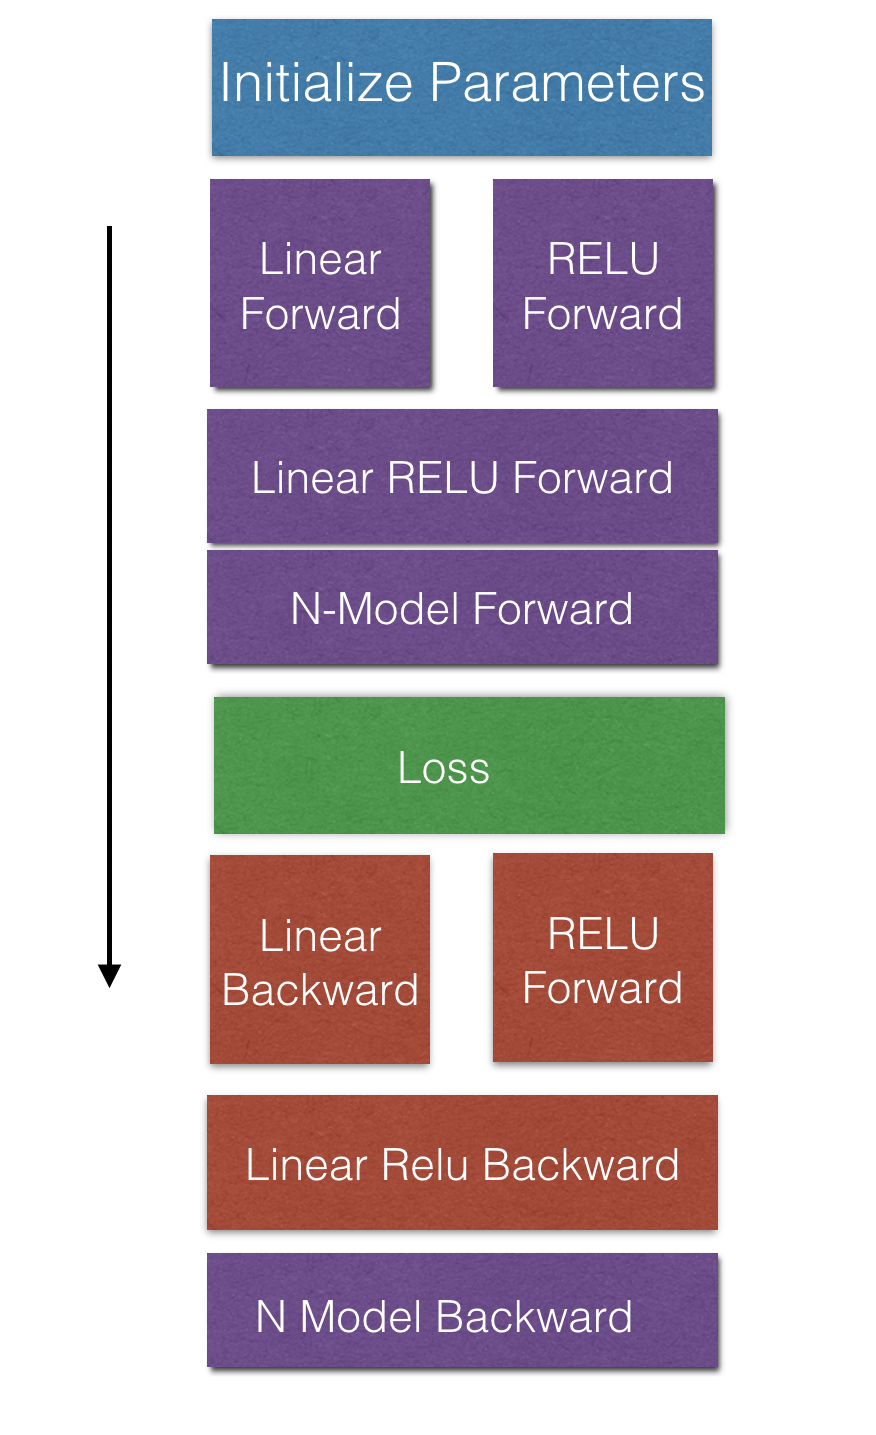

In [2]:
display(Image(filename='images/structure.png', width=800, height=500))

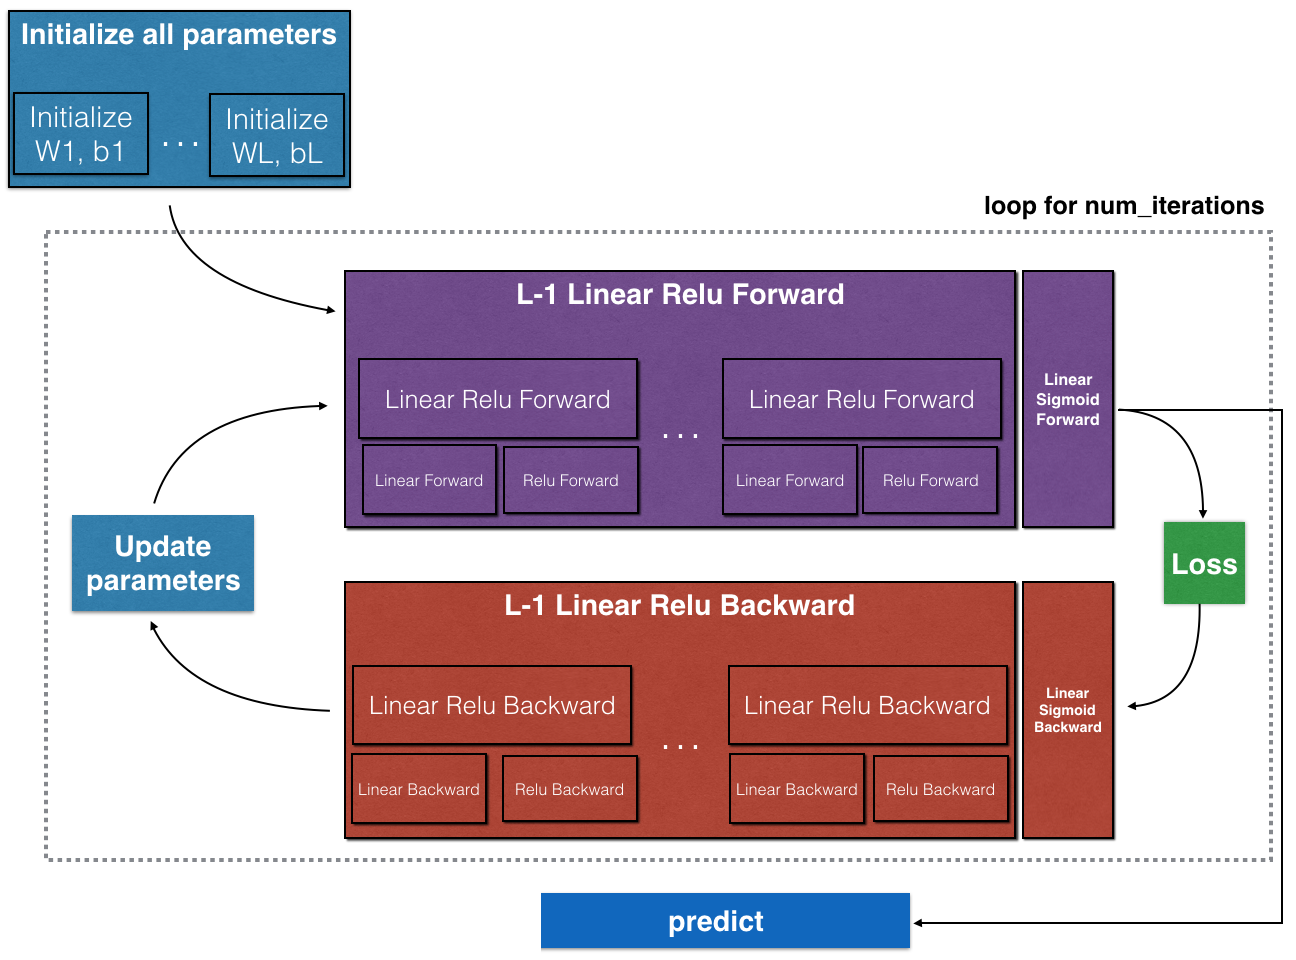

In [3]:
display(Image(filename='images/my_nn.png', width=800, height=500))

<a name='3'></a>
### **3 - Initialization**

Implement initialization for an L-layer Neural Network.

In [4]:
def initialize_parameters_deep(layer_dims):
    """
    Initialize weights and biases for an L-layer deep neural network.

    Arguments:
    layer_dims -- list containing the dimensions of each layer (including input and output)

    Returns:
    parameters -- dictionary containing parameters "W1", "b1", ..., "WL", "bL":
                  Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                  bl -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(3)  # for reproducibility
    parameters = {}
    L = len(layer_dims)  # number of layers including input layer

    for l in range(1, L):
        parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))

    return parameters

<a name='4'></a>
## 4 - Forward Propagation Module
- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

<a name='4-1'></a>
### 4.1 - Linear Forward
The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$

where $A^{[0]} = X$.

In [5]:
def linear_forward(A, W, b):
    """
    Compute the linear part of forward propagation for a single layer.

    Arguments:
    A -- activations from the previous layer (or input data),
         shape: (size of previous layer, number of examples)
    W -- weights matrix,
         shape: (size of current layer, size of previous layer)
    b -- bias vector,
         shape: (size of current layer, 1)

    Returns:
    Z -- linear component of activation (pre-activation)
    cache -- tuple (A, W, b) stored for backpropagation
    """
    Z = np.dot(W, A) + b
    cache = (A, W, b)

    return Z, cache


<a name='4-2'></a>
### 4.2 - Linear-Activation Forward

In [6]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Perform forward propagation for the LINEAR -> ACTIVATION layer.

    Arguments:
    A_prev -- activations from the previous layer (or input data),
              shape: (size of previous layer, number of examples)
    W -- weights matrix,
         shape: (size of current layer, size of previous layer)
    b -- bias vector,
         shape: (size of current layer, 1)
    activation -- string: "sigmoid" or "relu" specifying the activation function

    Returns:
    A -- output of the activation function (post-activation value)
    cache -- tuple (linear_cache, activation_cache) for use in backpropagation
    """
    Z, linear_cache = linear_forward(A_prev, W, b)

    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)
    else:
        raise ValueError(f"Unsupported activation function: {activation}")

    cache = (linear_cache, activation_cache)

    return A, cache

<a name='4-3'></a>
### 4.3 - L-Model Forward

In [7]:
def L_model_forward(X, parameters):
    """
    Perform forward propagation for the full [LINEAR -> RELU] * (L-1) -> LINEAR -> SIGMOID model.

    Arguments:
    X -- input data, shape: (input size, number of examples)
    parameters -- dictionary of parameters from initialize_parameters_deep()

    Returns:
    AL -- output of the final layer (activation from the last layer)
    caches -- list of caches from each layer for use in backpropagation
    """
    caches = []
    A = X
    L = len(parameters) // 2  # number of layers in the network

    # Forward propagate through all layers except the last
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(
            A_prev,
            parameters[f'W{l}'],
            parameters[f'b{l}'],
            activation='relu'
        )
        caches.append(cache)

    # Final layer uses sigmoid activation
    AL, cache = linear_activation_forward(
        A,
        parameters[f'W{L}'],
        parameters[f'b{L}'],
        activation='sigmoid'
    )
    caches.append(cache)

    return AL, caches

<a name='5'></a>
## 5 - Cost Function
Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$


In [8]:
def compute_cost(AL, Y):
    """
    Compute the binary cross-entropy cost.

    Arguments:
    AL -- predicted probabilities, shape: (1, number of examples)
    Y -- true labels, shape: (1, number of examples)

    Returns:
    cost -- scalar value of the cross-entropy loss
    """
    m = Y.shape[1]

    cost = (-1 / m) * np.sum(
        np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL))
    )
    cost = np.squeeze(cost)  # Ensure cost is a scalar (e.g. turns [[17]] into 17)

    return cost

<a name='6'></a>
## 6 - Backward Propagation Module

Now, similarly to forward propagation, we're going to build the backward propagation in three steps:
1. LINEAR backward
2. LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
3. [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

### My Network Architecture


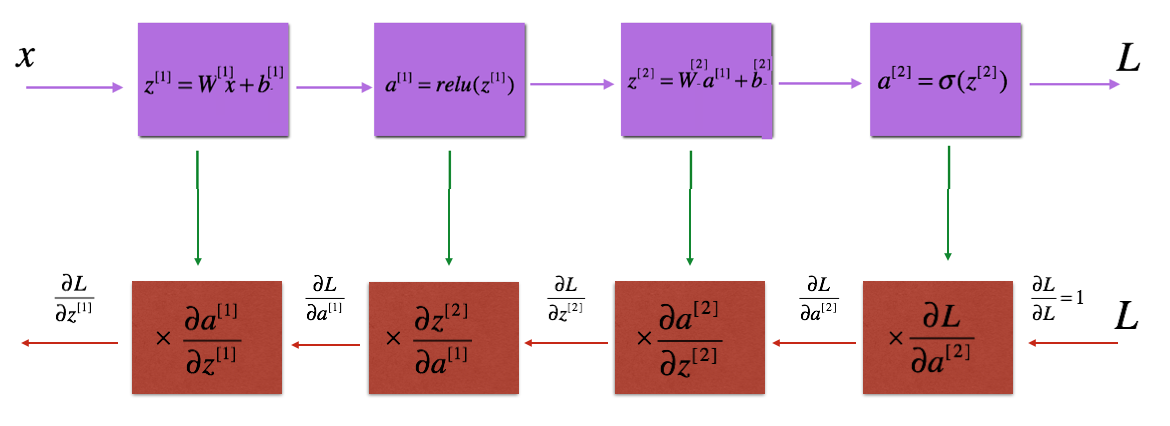

In [9]:
print("### My Network Architecture")
display(Image(filename='images/backprop.png', width=800, height=500))

<a name='6-1'></a>
### 6.1 - Linear Backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$

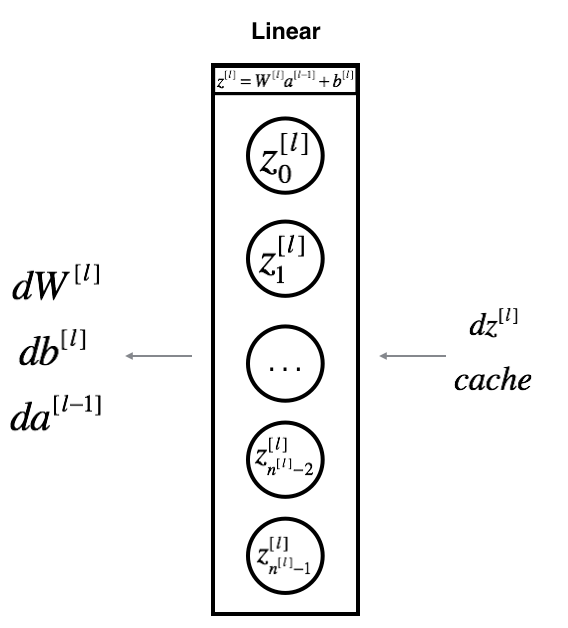

In [10]:
display(Image(filename='images/linearback.png', width=800, height=500))

In [11]:
def linear_backward(dZ, cache):
    """
    Compute the linear part of backward propagation for a single layer.

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (Z) of the current layer
    cache -- tuple of (A_prev, W, b) from the forward propagation of the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation from the previous layer (A_prev)
    dW -- Gradient of the cost with respect to the weights (W)
    db -- Gradient of the cost with respect to the bias (b)
    """
    A_prev, W, _ = cache
    m = A_prev.shape[1]

    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db

<a name='6-2'></a>
### 6.2 - Linear-Activation Backward
Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [12]:
def linear_activation_backward(dA, cache, activation):
    """
    Perform the backward propagation for a LINEAR -> ACTIVATION layer.

    Arguments:
    dA -- Gradient of the loss with respect to the activation output of the current layer
    cache -- tuple of (linear_cache, activation_cache) from forward propagation
    activation -- activation function used in this layer: "relu" or "sigmoid"

    Returns:
    dA_prev -- Gradient with respect to the activation from the previous layer
    dW -- Gradient with respect to the weights
    db -- Gradient with respect to the bias
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    else:
        raise ValueError(f"Unsupported activation function: {activation}")

    dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

<a name='6-3'></a>
### 6.3 - L-Model Backward
Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [13]:
def L_model_backward(AL, Y, caches):
    """
    Implement the full backward propagation for the [LINEAR -> RELU] * (L-1) -> LINEAR -> SIGMOID model.

    Arguments:
    AL -- probability vector, output of the forward propagation (shape: [1, number of examples])
    Y -- true label vector (same shape as AL)
    caches -- list of caches from linear_activation_forward() for all layers:
              caches[0 to L-2] from "relu", cache[L-1] from "sigmoid"

    Returns:
    grads -- dictionary with gradients:
             grads["dA{l}"], grads["dW{l+1}"], grads["db{l+1}"] for l in 0 to L-1
    """
    grads = {}
    L = len(caches)  # total number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)  # Ensure shape match with AL

    # Derivative of cost with respect to AL (for sigmoid output layer)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Backprop through the last layer (sigmoid)
    current_cache = caches[L - 1]
    dA_prev, dW, db = linear_activation_backward(dAL, current_cache, activation='sigmoid')
    grads[f"dA{L - 1}"] = dA_prev
    grads[f"dW{L}"] = dW
    grads[f"db{L}"] = db

    # Loop over hidden layers in reverse order
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev, dW, db = linear_activation_backward(grads[f"dA{l + 1}"], current_cache, activation='relu')
        grads[f"dA{l}"] = dA_prev
        grads[f"dW{l + 1}"] = dW
        grads[f"db{l + 1}"] = db

    return grads

<a name='6-4'></a>
### 6.4 - Update Parameters

In [14]:
def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent.

    Arguments:
    params -- dictionary containing current weights and biases
    grads -- dictionary containing gradients from backpropagation
    learning_rate -- learning rate for gradient descent

    Returns:
    parameters -- dictionary containing updated weights and biases
    """
    # deep copy
    import copy
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2  # number of layers

    for l in range(1, L + 1):
        parameters[f"W{l}"] -= learning_rate * grads[f"dW{l}"]
        parameters[f"b{l}"] -= learning_rate * grads[f"db{l}"]

    return parameters

<a name='7'></a>
## 7 - L-layer Neural Network

In [15]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements an L-layer neural network: [LINEAR -> RELU] * (L-1) -> LINEAR -> SIGMOID

    Arguments:
    X -- input data of shape (n_x, m)
    Y -- true labels of shape (1, m)
    layers_dims -- list containing the size of each layer (including input and output)
    learning_rate -- learning rate for gradient descent
    num_iterations -- number of training iterations
    print_cost -- if True, prints the cost every 100 iterations

    Returns:
    parameters -- learned parameters to be used for prediction
    costs -- list of cost values recorded every 100 iterations
    """
    np.random.seed(1)
    costs = []

    # Initialize parameters
    parameters = initialize_parameters_deep(layers_dims)

    # Optimization loop
    for i in range(num_iterations):

        # Forward propagation
        AL, caches = L_model_forward(X, parameters)

        # Compute cost
        cost = compute_cost(AL, Y)

        # Backward propagation
        grads = L_model_backward(AL, Y, caches)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Record and optionally print cost
        if i % 100 == 0 or i == num_iterations - 1:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {np.squeeze(cost)}")

    return parameters, costs

<a name='8'></a>
### 8 - Predict

In [16]:
def predict(X, y, parameters, verbose=True):
    """
    Predicts binary labels for a dataset using a trained L-layer neural network.

    Arguments:
    X -- input data of shape (n_x, m)
    y -- true labels of shape (1, m)
    parameters -- learned parameters of the model
    verbose -- if True, prints the accuracy

    Returns:
    p -- predicted labels of shape (1, m)
    """
    # Forward propagation
    AL, _ = L_model_forward(X, parameters)

    # Convert probabilities to 0/1 predictions (vectorized)
    p = (AL > 0.5).astype(int)

    # Compute accuracy
    accuracy = np.mean(p == y)
    if verbose:
        print(f"Accuracy: {accuracy * 100:.2f}%")

    return p

<a name='9'></a>
### 9 - Load Dataset, Train and Predict

In [17]:
train_x, train_y, test_x, test_y, classes = load_and_prepare_data(show_info=True)

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)
train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


y = 0. It's a non-cat picture.


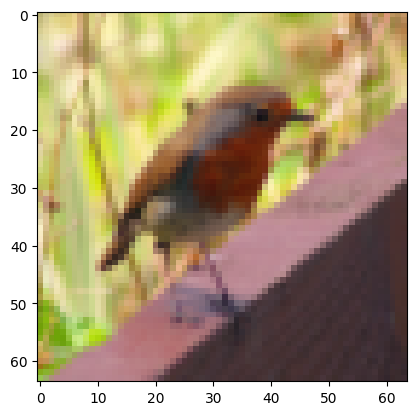

In [18]:
show_image(10, train_x, train_y, classes)

In [19]:
layers_dims = [train_x.shape[0], 20, 7, 5, 1]
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True)

Cost after iteration 0: 0.7157315134137129
Cost after iteration 100: 0.6747377593469114
Cost after iteration 200: 0.6603365433622128
Cost after iteration 300: 0.6462887802148751
Cost after iteration 400: 0.6298131216927771
Cost after iteration 500: 0.606005622926534
Cost after iteration 600: 0.5690041263975135
Cost after iteration 700: 0.519796535043806
Cost after iteration 800: 0.46415716786282285
Cost after iteration 900: 0.40842030048298916
Cost after iteration 1000: 0.37315499216069037
Cost after iteration 1100: 0.30572374573047123
Cost after iteration 1200: 0.2681015284774084
Cost after iteration 1300: 0.23872474827672593
Cost after iteration 1400: 0.20632263257914715
Cost after iteration 1500: 0.1794388692749355
Cost after iteration 1600: 0.1579873581880123
Cost after iteration 1700: 0.14240413012273956
Cost after iteration 1800: 0.12865165997885952
Cost after iteration 1900: 0.1124431499815583
Cost after iteration 2000: 0.08505631034967295
Cost after iteration 2100: 0.0575839119

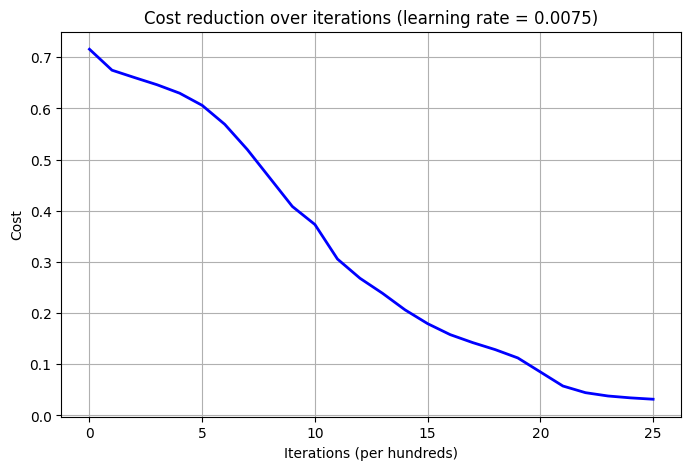

Train Accuracy:
Accuracy: 99.52%
Test Accuracy:
Accuracy: 78.00%


In [20]:
plot_costs(costs)
print("Train Accuracy:")
pred_train = predict(train_x, train_y, parameters)
print("Test Accuracy:")
pred_test = predict(test_x, test_y, parameters)

Accuracy: 100.00%
y = 1, L-layer model predicts a "cat" picture.


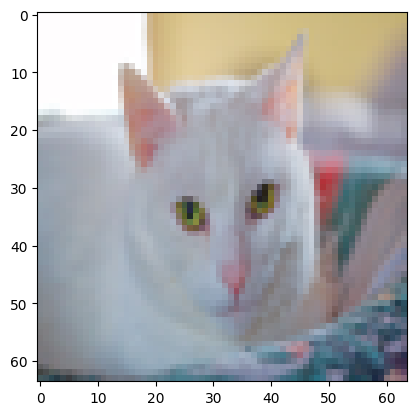

In [23]:
from PIL import Image
my_image = "images/my_image.jpg"
my_label_y = [1]
image = np.array(Image.open(my_image).resize((64, 64)))
my_image = image.reshape(image.shape[0] * image.shape[1] * 3, 1)
my_image = my_image / 255.
my_predicted_image = predict(my_image, my_label_y, parameters)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")